# Name: PAULOMI NANDI
The Sparks Foundation- "Data Science & Business Analytics Internship"

GRIP: JUNE-2022

Task-2: Prediction Using Unsupervised Machine Learning

In [33]:
# Importing all the liabaries required for this notebook
from sklearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.patches as mpatches
import sklearn.metrics as sm
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report,confusion_matrix

In [22]:
# Load the Iris dataset
iris= datasets.load_iris()
iris_df= pd.DataFrame(iris.data, columns=iris.feature_names)

# Seeing the first 5 rows
iris_df.head(10)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


In [6]:
iris_df.sample(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
31,5.4,3.4,1.5,0.4
27,5.2,3.5,1.5,0.2
39,5.1,3.4,1.5,0.2
57,4.9,2.4,3.3,1.0
80,5.5,2.4,3.8,1.1
128,6.4,2.8,5.6,2.1
47,4.6,3.2,1.4,0.2
6,4.6,3.4,1.4,0.3
65,6.7,3.1,4.4,1.4
46,5.1,3.8,1.6,0.2


In [7]:
iris_df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [8]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [10]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [11]:
x= pd.DataFrame(iris.data, columns=['sepal length','sepal width','petal length','petal width'])
y= pd.DataFrame(iris.target,columns= ['Target'] )
print(type(x))

<class 'pandas.core.frame.DataFrame'>


# Finding optimal K value using elbow method

C:\Users\paulo\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


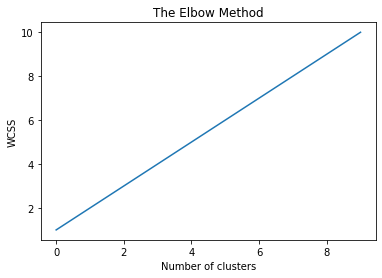

In [25]:
# Findings the optimum number of clusters for K-Means classifications
X= iris_df.iloc[:,[0,1,2,3]].values

from sklearn.cluster import KMeans
wcss= []

for i in range (1,11):
    kmeans= KMeans(n_clusters=i, init='k-means++', max_iter= 300, n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the result in a line graph
plt.plot(range(1,11))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()
    

In [26]:
#Applying kmeans to the dataset 
kmeans= KMeans(n_clusters=3, init='k-means++', max_iter= 300, n_init=10,random_state=0)
y_kmeans= kmeans.fit_predict(X)
model= kmeans.fit(X)

y_pred = np.choose(model.labels_,[1,0,2]).astype(np.int64)
print(type(y_kmeans))

<class 'numpy.ndarray'>


# Data Visualization
Plotting the Boxplot

<AxesSubplot:ylabel='petal width (cm)'>

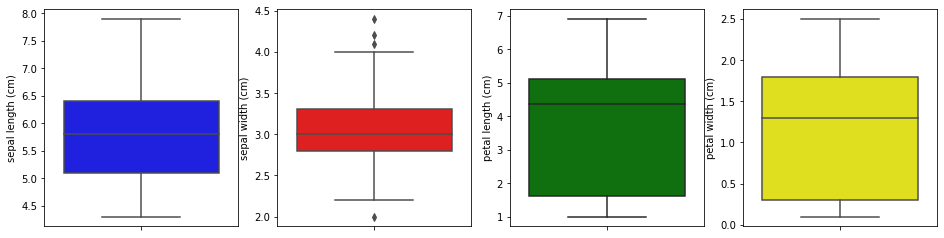

In [34]:
# Plotting the Boxplot
plt.figure(figsize=(16,4))
plt.subplot(1,4,1)
sns.boxplot(data=iris_df, y='sepal length (cm)', color='blue')
plt.subplot(1,4,2)
sns.boxplot(data=iris_df, y='sepal width (cm)',color='red')
plt.subplot(1,4,3)
sns.boxplot(data=iris_df, y='petal length (cm)',color='green')
plt.subplot(1,4,4)
sns.boxplot(data=iris_df, y='petal width (cm)',color='yellow')                        

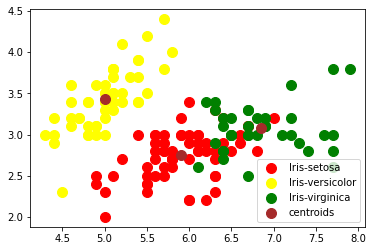

In [35]:
# Visualising the clusters 
plt.scatter(x[y_kmeans== 0,0],x[y_kmeans== 0,1], s=100,c='red', label= 'Iris-setosa')
plt.scatter(x[y_kmeans== 1,0],x[y_kmeans== 1,1], s=100,c='Yellow', label= 'Iris-versicolor')
plt.scatter(x[y_kmeans== 2,0],x[y_kmeans== 2,1], s=100,c='green', label= 'Iris-virginica')

#plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='brown',label='centroids')
plt.legend()

# Plotting heat map

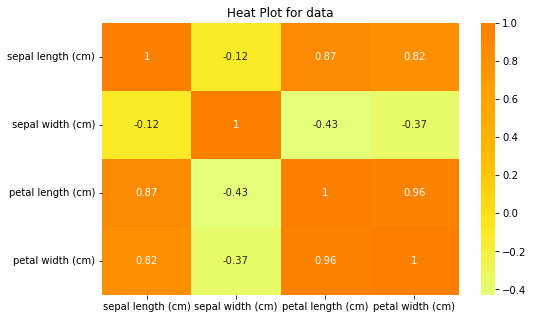

In [36]:
# heat map plot
plt.figure(figsize=(8,5))
sns.heatmap(iris_df.corr(),annot=True,cmap='Wistia')
plt.title('Heat Plot for data')
plt.show()

In [39]:
# Printing the score
import sklearn.metrics as sm
Score=sm.accuracy_score(y_pred,y.values)
Score

0.8933333333333333

In [40]:
# Printing confusion matrix
sm.confusion_matrix(y_pred,y.values)


array([[50,  0,  0],
       [ 0, 48, 14],
       [ 0,  2, 36]], dtype=int64)

The accuracy_score indicates how efficiently the prediction has been made.
Hence unsupervised prediction model is built successfully and prepared the clusters according to the Iris Dataset. 

# Thank you.